In [1]:
from matplotlib.image import imread
from Hand_digits import *

Cost at epoch 0: 4.6072
Cost at epoch 5000: 1.3619
Cost at epoch 10000: 0.3633
Cost at epoch 15000: 0.1952
Cost at epoch 20000: 0.1233
Accuracy for train set: 99.0 %


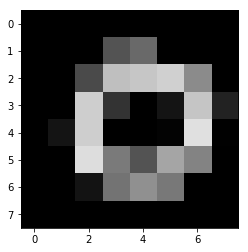

Picture is a 4!


In [5]:
image = imread('/Users/andrea/Desktop/prova4.png')
plt.imshow(image)
plt.show()
predict_image(image, parameters)